# Wind Data EDA

Imports

In [1]:
from IPython.display import clear_output
!pip install cartopy
clear_output()

In [2]:
import pandas as pd 
import numpy as np
import os 

import matplotlib.pyplot as plt
import plotly.express as px

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

Set paths:

In [3]:
# local or gdrive
path_source = 'gdrive'

if path_source == 'gdrive':
  from google.colab import drive
  drive.mount('/content/gdrive')
  mapbox_path = '/content/gdrive/MyDrive/Classes/W210_capstone/.mapbox_token'
  wind_path = '/content/gdrive/MyDrive/Classes/W210_capstone/W210 Capstone/Data/wind'
  os.chdir('/content/gdrive/MyDrive/Classes/W210_capstone/JLPS_capstone_project/data_clean_scripts/wind')

elif path_source == 'local':
  maxbox_path = '/Users/tj/Documents/code/api_key/.mapbox_token'
  wind_path = '/Users/tj/trevorj@berkeley.edu - Google Drive/My Drive/Classes/W210_capstone/W210 Capstone/Data/wind'
  os.chdir('/Users/tj/trevorj@berkeley.edu - Google Drive/MyDrive/Classes/W210_capstone/JLPS_capstone_project/data_clean_scripts/wind')

px.set_mapbox_access_token(open(mapbox_path).read())

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
df = pd.read_parquet(wind_path)

# Plotly Map
- This package does not support putting arrows out of the box to signify wind direction. 
- But the color can signify wind direction

In [5]:
df_small = df[df['year_month'] == '200702']
fig = px.scatter_mapbox(df_small, lat="lat", lon="lon", 
  color="wdir", size="wspd",
  color_continuous_scale=px.colors.cyclical.IceFire, 
  size_max=15, zoom=5)
fig.show()

In [6]:
df_small = df[df['year_month'] == '200112']
fig = px.scatter_mapbox(df_small, lat="lat", lon="lon", 
  color="wdir", size="wspd",
  color_continuous_scale=px.colors.cyclical.IceFire, 
  size_max=15, zoom=5)
fig.show()

Plotly won't render in github, so here's a screenshot of this plotting option. You can click, drag, and hover on points to get wind info. The color represents wind direction. And dot size represents speed. Probably not the best data representation, but a simple way to do it with this package. 

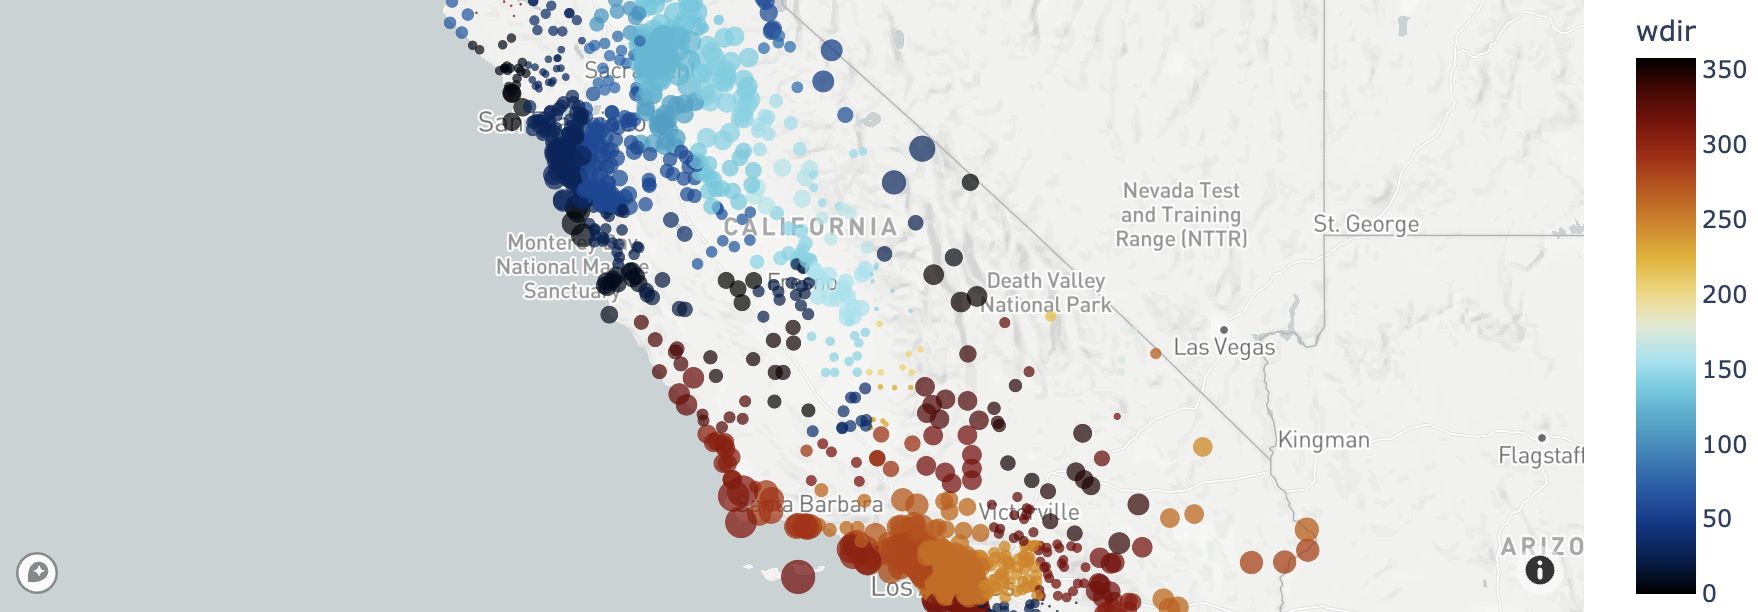

In [7]:
from IPython.display import Image
Image('plotly_wind_map.png')

# Matplotlib map
- Wind direction with matplotlib

In [ ]:
lon, lat = np.meshgrid(df.lon, df.lat)

fig = plt.figure(figsize=(8,4))
ax = plt.axes(projection=ccrs.Robinson())
ax.set_global()
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

clevs = np.arange(0,19,1)
plt.contourf(lon, lat, df.wspd, clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
# plt.title('MERRA-2 Daily Average 2-meter Wind Speed, 1 June 2010', size=14)
cb = plt.colorbar(ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
cb.set_label('m/s',size=12,rotation=0,labelpad=15)
cb.ax.tick_params(labelsize=10)

In [ ]:
# had to install cartopy like this:
# sudo pip3 install cartopy --no-binary :all:

In [ ]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(lakes)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import iris
import iris.coord_categorisation
import iris.quickplot as qplt

import cartopy
import cartopy.feature as cfeat
import cartopy.crs as ccrs


def main():
    # Load the u and v components of wind from a pp file
    infile = iris.sample_data_path('wind_speed_lake_victoria.pp')

    uwind = iris.load_cube(infile, 'x_wind')
    vwind = iris.load_cube(infile, 'y_wind')

    ulon = uwind.coord('longitude')
    vlon = vwind.coord('longitude')

    # The longitude points go from 180 to 540, so subtract 360 from them
    ulon.points = ulon.points - 360.0
    vlon.points = vlon.points - 360.0

    # Create a cube containing the wind speed
    windspeed = (uwind ** 2 + vwind ** 2) ** 0.5
    windspeed.rename('windspeed')

    x = ulon.points
    y = uwind.coord('latitude').points
    u = uwind.data
    v = vwind.data

    # Set up axes to show the lake
    lakes = cfeat.NaturalEarthFeature('physical', 'lakes', '50m',
                                      facecolor='none')

    plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(lakes)

    # Get the coordinate reference system used by the data
    transform = ulon.coord_system.as_cartopy_projection()

    # Plot the wind speed as a contour plot
    qplt.contourf(windspeed, 20)

    # Add arrows to show the wind vectors
    plt.quiver(x, y, u, v, pivot='middle', transform=transform)

    plt.title("Wind speed over Lake Victoria")
    qplt.show()

    # Normalise the data for uniform arrow size
    u_norm = u / np.sqrt(u ** 2.0 + v ** 2.0)
    v_norm = v / np.sqrt(u ** 2.0 + v ** 2.0)

    plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(lakes)

    qplt.contourf(windspeed, 20)

    plt.quiver(x, y, u_norm, v_norm, pivot='middle', transform=transform)

    plt.title("Wind speed over Lake Victoria")
    qplt.show()

if __name__ == '__main__':
    main()

RuntimeError: 

Ambiguous 'iris' package.
Please use either:

**illumon-iris** - Python integration for Illumon Iris, a time-series database
  - pip install illumon-iris
  - https://pypi.python.org/pypi/illumon-iris
  - https://deephaven.io/

**SciTools Iris** - Python library for analysing and visualising meteorological and oceanographic data sets
  - http://scitools.org.uk/iris/

**info.gianlucacosta.iris** - A general-purpose library for Python
  - pip install info.gianlucacosta.iris
  - https://pypi.python.org/pypi/info.gianlucacosta.iris

**irisapi** - Iris is a highly configurable and flexible service for paging and messaging
  - pip install irisapi
  - https://pypi.org/project/irisapi/
  - https://iris.claims/
